<a href="https://colab.research.google.com/github/Wesley-Mesquita-Lira/ia-buscas/blob/master/IA_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


<ipython-input-17-1619e57784a0>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


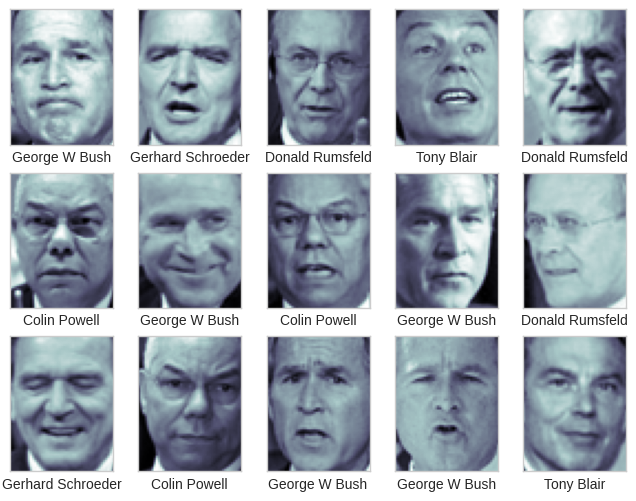

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(3, 5, figsize=(8, 6))
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[],
          xlabel=faces.target_names[faces.target[i]])

In [18]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True,
          svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [19]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 46 s, sys: 36.1 s, total: 1min 22s
Wall time: 49.5 s
{'svc__C': 1, 'svc__gamma': 0.005}


In [21]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

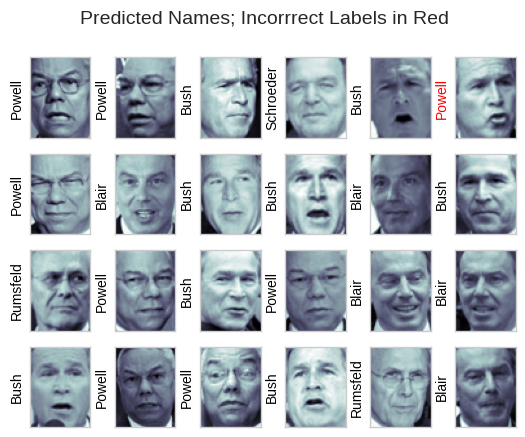

In [22]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
  axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                 color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrrect Labels in Red', size=14);

In [23]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.86      0.95      0.90        64
  Donald Rumsfeld       0.87      0.84      0.86        32
    George W Bush       0.95      0.93      0.94       127
Gerhard Schroeder       0.89      0.83      0.86        29
       Tony Blair       0.91      0.88      0.89        33

         accuracy                           0.91       285
        macro avg       0.90      0.89      0.89       285
     weighted avg       0.91      0.91      0.91       285

